In [13]:
import helpers
import numpy as np
import re
import math
from tqdm import tqdm
import copy
import networkx as nx

data = """2199943210
3987894921
9856789892
8767896789
9899965678"""

with open("input_9.txt", 'r') as f:
    data = f.read()
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
#data = re.findall("(\d+),(\d+) -> (\d+),(\d+)", data)
#data = [x.rstrip() for x in data.split("\n\n") if x]

data = data.lstrip()
data = data.rstrip()
data = [[int(y) for y in x] for x in data.split("\n")]
data

[[6,
  7,
  6,
  9,
  8,
  7,
  6,
  8,
  8,
  7,
  6,
  9,
  8,
  9,
  9,
  9,
  8,
  7,
  6,
  3,
  6,
  7,
  8,
  9,
  8,
  5,
  4,
  3,
  2,
  1,
  2,
  3,
  7,
  8,
  9,
  9,
  7,
  6,
  5,
  4,
  3,
  2,
  1,
  2,
  9,
  1,
  0,
  9,
  8,
  7,
  6,
  5,
  4,
  3,
  2,
  3,
  9,
  8,
  7,
  6,
  7,
  6,
  6,
  7,
  9,
  8,
  9,
  9,
  7,
  6,
  5,
  4,
  3,
  2,
  1,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  9,
  8,
  7,
  6,
  7,
  8,
  9,
  9,
  9,
  7,
  6,
  6,
  5,
  9,
  8,
  9,
  2,
  1],
 [5,
  4,
  5,
  6,
  9,
  6,
  5,
  4,
  7,
  6,
  5,
  6,
  7,
  9,
  9,
  9,
  9,
  8,
  5,
  4,
  5,
  7,
  8,
  9,
  7,
  6,
  5,
  4,
  3,
  0,
  1,
  4,
  5,
  6,
  9,
  8,
  9,
  7,
  4,
  3,
  2,
  1,
  0,
  9,
  8,
  9,
  9,
  8,
  9,
  8,
  9,
  8,
  5,
  4,
  0,
  9,
  8,
  7,
  6,
  5,
  6,
  5,
  4,
  5,
  6,
  7,
  8,
  9,
  8,
  7,
  6,
  5,
  4,
  3,
  2,
  3,
  6,
  3,
  4,
  6,
  7,
  9,
  8,
  7,
  6,
  5,
  6,
  9,
  9,
  9,
  8,
  7,
  5,
  7,
  3,
  8,
  7,
  8,
  9,
  2]

In [14]:
def getNeighbours(pos):
    DYDX = [(1,0),(0,1), (-1,0), (0,-1)]
    n_list = []
    pos_list = []
    for dydx in DYDX:
        new_pos = (pos[0]+dydx[0],pos[1]+dydx[1])
        if -1 < new_pos[0] < len(data[0]) and -1 < new_pos[1] < len(data):
            char = data[new_pos[1]][new_pos[0]]
            pos_list.append((new_pos[0],new_pos[1]))
        else:
            continue
        if not char == " ":
            n_list.append(char)
    return n_list, pos_list

In [15]:
G = nx.Graph()
ans = 0
for y, c in enumerate(data):
    for x, v in enumerate(c):
        if not v == 9:
            G.add_node((x,y), height=v)
            val = v
            neighs, pos = getNeighbours((x,y))
            #print(pos)
            for i, n in enumerate(neighs):
                if not n == 9 and v < n:
                    G.add_edge((x,y),pos[i])


In [17]:
comps = []
for x in nx.connected_components(G):
    comps.append(len(x))
comps.sort(reverse=True)
np.prod([x for x in comps[0:3]])

1317792

ModuleNotFoundError: No module named 'scipy'

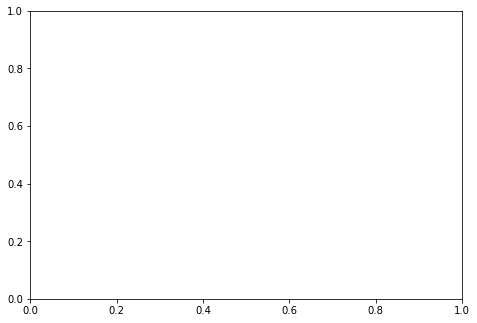

In [18]:
nx.draw(G)